**Installing HRV Analysis**

In [1]:
!pip install hrv-analysis

**Installing the WFDB package**

In [2]:
!pip install wfdb

     |████████████████████████████████| 137 kB 11.5 MB/s 
     |████████████████████████████████| 10.3 MB 84.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

results = {}

## Download content from Physionet

In [4]:
# List the PhysioNet Databases

dbs = wfdb.get_dbs()
display(dbs)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['autonomic-aging-cardiovascular',
  'Autonomic Aging: A dataset to quantify changes of cardiovascular autonomic function during healthy aging'],
 ['bhx-brain-bounding-box',
  'Brain Hemorrhage Extended (BHX): Bounding box extrapolation from thick to thin slice CT images'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bigideaslab-step-hr-smartwatch',
  'BigIdeasLab_STEP: Heart rate measurements captured by smartwatch

In [5]:
# Download all the WFDB records and annotations from a small PhysioNet Database

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
wfdb.dl_database('apnea-ecg', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

Generating record list for: a01
Generating record list for: a01er
Generating record list for: a01r
Generating record list for: a02
Generating record list for: a02er
Generating record list for: a02r
Generating record list for: a03
Generating record list for: a03er
Generating record list for: a03r
Generating record list for: a04
Generating record list for: a04er
Generating record list for: a04r
Generating record list for: a05
Generating record list for: a06
Generating record list for: a07
Generating record list for: a08
Generating record list for: a09
Generating record list for: a10
Generating record list for: a11
Generating record list for: a12
Generating record list for: a13
Generating record list for: a14
Generating record list for: a15
Generating record list for: a16
Generating record list for: a17
Generating record list for: a18
Generating record list for: a19
Generating record list for: a20
Generating record list for: b01
Generating record list for: b01er
Generating record list for

['x05.hea',
 'x19.hea',
 'x13.hea',
 'x06.apn',
 'x26.qrs',
 'x25.hea',
 'c03r.hea',
 'a01er.qrs',
 'a08.apn',
 'x01.dat',
 'c09.apn',
 'x17.dat',
 'x08.dat',
 'c09.dat',
 'x15.qrs',
 'x10.qrs',
 'c04.qrs',
 'x16.hea',
 'c01.dat',
 'a01r.hea',
 'b04.qrs',
 'a16.dat',
 'x25.dat',
 'a15.apn',
 'x15.dat',
 'x21.apn',
 'a08.hea',
 'a04.qrs',
 'a02.dat',
 'x29.hea',
 'x01.qrs',
 'c01.hea',
 'x09.hea',
 'x02.hea',
 'a13.dat',
 'a14.qrs',
 'c03er.apn',
 'a19.qrs',
 'c10.apn',
 'c08.hea',
 'x32.apn',
 'x21.dat',
 'a11.qrs',
 'x20.qrs',
 'a03er.apn',
 'a01er.apn',
 'c01r.hea',
 'x12.apn',
 'a18.apn',
 'x13.apn',
 'a04.dat',
 'a03r.dat',
 'a19.apn',
 'a20.qrs',
 'x34.dat',
 'x22.dat',
 'a12.qrs',
 'x23.qrs',
 'c03.apn',
 'x10.apn',
 'x07.dat',
 'c10.dat',
 'x11.apn',
 'x35.dat',
 'b01er.hea',
 'c03er.hea',
 'a02.apn',
 'x14.hea',
 'a03.dat',
 'x08.qrs',
 'b02.apn',
 'x07.hea',
 'x18.qrs',
 'a16.apn',
 'c01er.apn',
 'x31.apn',
 'b05.qrs',
 'a04r.dat',
 'a18.dat',
 'a02er.qrs',
 'x09.apn',
 'x12.d

## Pre-processing and peak detection

In [6]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 102 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wfdb 3.4.1 requires matplotlib>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


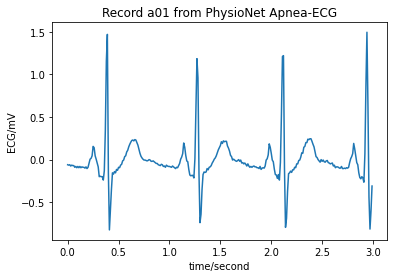

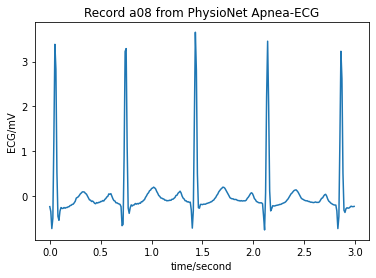

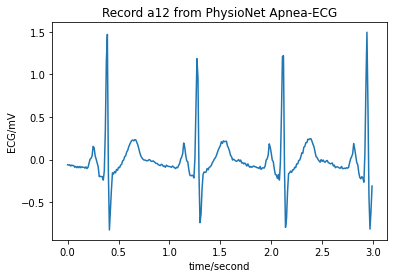

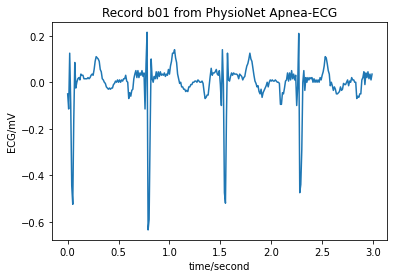

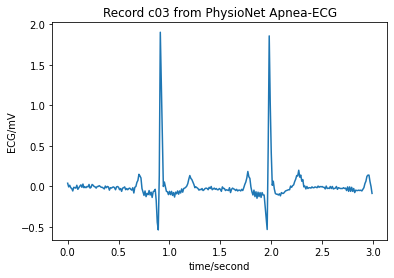

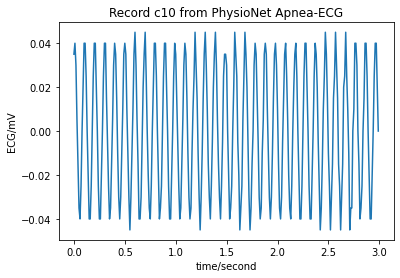

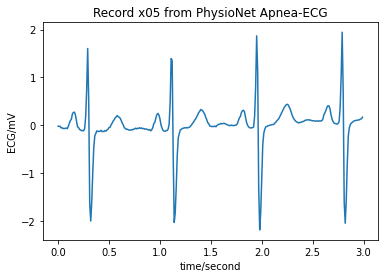

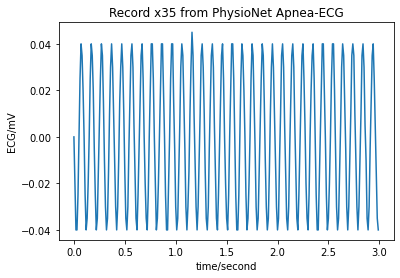

In [27]:
import wfdb
from wfdb import processing
import matplotlib.pyplot as plt
import matplotlib

record = wfdb.rdrecord('tmp_dl_dir/a01', sampfrom=0, sampto=300)
wfdb.plot_wfdb(record=record,time_units='seconds', title='Record a01 from PhysioNet Apnea-ECG') 

record1 = wfdb.rdrecord('tmp_dl_dir/a08', sampfrom=0, sampto=300)
wfdb.plot_wfdb(record=record1,time_units='seconds', title='Record a08 from PhysioNet Apnea-ECG')

record2 = wfdb.rdrecord('tmp_dl_dir/a12', sampfrom=0, sampto=300)
wfdb.plot_wfdb(record=record,time_units='seconds', title='Record a12 from PhysioNet Apnea-ECG')

record = wfdb.rdrecord('tmp_dl_dir/b01', sampfrom=0, sampto=300)
wfdb.plot_wfdb(record=record2,time_units='seconds', title='Record b01 from PhysioNet Apnea-ECG')


record3 = wfdb.rdrecord('tmp_dl_dir/c03', sampfrom=0, sampto=300)
wfdb.plot_wfdb(record=record3,time_units='seconds', title='Record c03 from PhysioNet Apnea-ECG')


record4 = wfdb.rdrecord('tmp_dl_dir/c10', sampfrom=0, sampto=300)
wfdb.plot_wfdb(record=record4,time_units='seconds', title='Record c10 from PhysioNet Apnea-ECG')


record5 = wfdb.rdrecord('tmp_dl_dir/x05', sampfrom=0, sampto=300)
wfdb.plot_wfdb(record=record5,time_units='seconds', title='Record x05 from PhysioNet Apnea-ECG')

record6 = wfdb.rdrecord('tmp_dl_dir/x35', sampfrom=0, sampto=300)
wfdb.plot_wfdb(record=record6,time_units='seconds', title='Record x35 from PhysioNet Apnea-ECG')



In [10]:
#Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()





In [12]:
!pip install biosppy

     |████████████████████████████████| 85 kB 3.1 MB/s 
  Created wheel for biosppy: filename=biosppy-0.7.3-py2.py3-none-any.whl size=95430 sha256=f5678f008de0975091f6aba2613f57b70d280d752d8e0512f936b1adfa4a5dc0
  Stored in directory: /root/.cache/pip/wheels/2f/4f/8f/28b2adc462d7e37245507324f4817ce1c64ef2464f099f4f0b
Successfully built biosppy


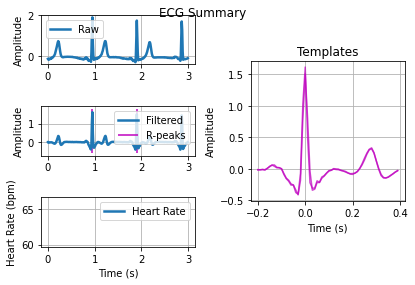

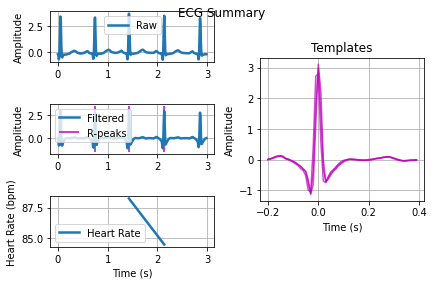

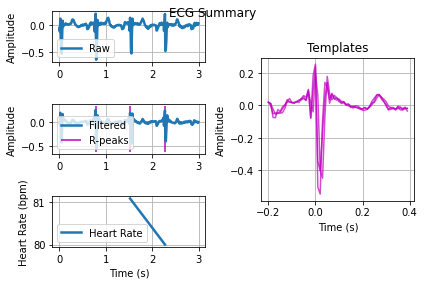

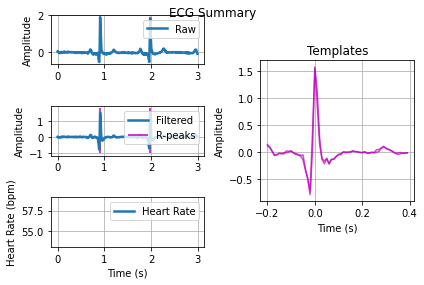

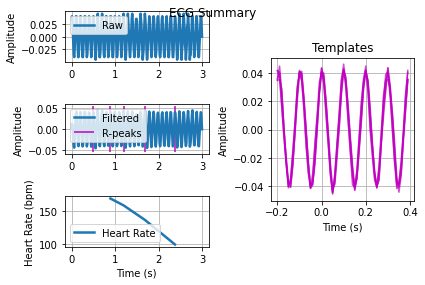

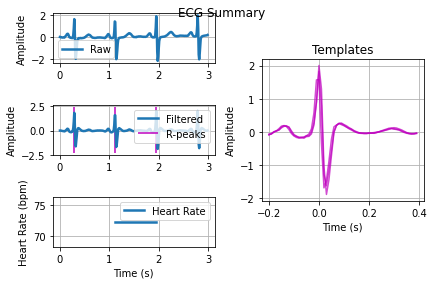

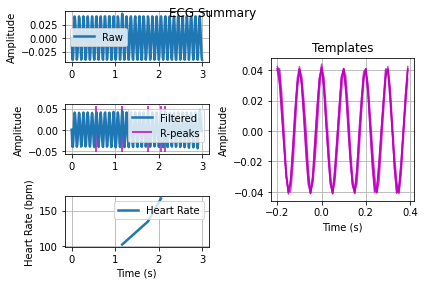

In [29]:
#get r peaks on this segment
import biosppy
ind= biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=True)

ind1= biosppy.signals.ecg.ecg(record1.p_signal[:,0], sampling_rate=100, show=True)

ind2= biosppy.signals.ecg.ecg(record2.p_signal[:,0], sampling_rate=100, show=True)

ind3= biosppy.signals.ecg.ecg(record3.p_signal[:,0], sampling_rate=100, show=True)

ind4= biosppy.signals.ecg.ecg(record4.p_signal[:,0], sampling_rate=100, show=True)

ind5= biosppy.signals.ecg.ecg(record5.p_signal[:,0], sampling_rate=100, show=True)

ind6= biosppy.signals.ecg.ecg(record6.p_signal[:,0], sampling_rate=100, show=True)

In [33]:
# Now load the entire duration of the signal and get r peaks

record = wfdb.rdrecord('tmp_dl_dir/a01', sampfrom=0,sampto=100000)
ind= biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=False)

record1 = wfdb.rdrecord('tmp_dl_dir/a08', sampfrom=0,sampto=100000)
ind1= biosppy.signals.ecg.ecg(record1.p_signal[:,0], sampling_rate=100, show=False)

record2 = wfdb.rdrecord('tmp_dl_dir/a12', sampfrom=0,sampto=100000)
ind2= biosppy.signals.ecg.ecg(record2.p_signal[:,0], sampling_rate=100, show=False)

record3 = wfdb.rdrecord('tmp_dl_dir/b01', sampfrom=0,sampto=100000)
ind3= biosppy.signals.ecg.ecg(record3.p_signal[:,0], sampling_rate=100, show=False)

record4 = wfdb.rdrecord('tmp_dl_dir/c03', sampfrom=0,sampto=100000)
ind4= biosppy.signals.ecg.ecg(record4.p_signal[:,0], sampling_rate=100, show=False)

record5 = wfdb.rdrecord('tmp_dl_dir/c10', sampfrom=0,sampto=100000)
ind5= biosppy.signals.ecg.ecg(record5.p_signal[:,0], sampling_rate=100, show=False)

record6 = wfdb.rdrecord('tmp_dl_dir/x05', sampfrom=0,sampto=100000)
ind6= biosppy.signals.ecg.ecg(record6.p_signal[:,0], sampling_rate=100, show=False)


In [35]:
print(ind.keys())

['ts', 'filtered', 'rpeaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


In [34]:
print(ind1.keys())

['ts', 'filtered', 'rpeaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


In [38]:
print(np.average(ind['heart_rate']))

print(np.average(ind1['heart_rate']))
print(np.average(ind2['heart_rate']))
print(np.average(ind3['heart_rate']))
print(np.average(ind4['heart_rate']))
print(np.average(ind5['heart_rate']))
print(np.average(ind6['heart_rate']))

72.96930558410631
87.13762273576891
79.41675797174076
62.28678375437395
52.968187732724644
113.70996434914028
72.66929005347684


In [39]:
rr_ind = np.diff(ind['rpeaks'])

In [40]:
rr_ms = [element * 10 for element in rr_ind]

In [41]:
print(rr_ms)

[880, 840, 830, 830, 880, 940, 970, 940, 930, 940, 1000, 1020, 1010, 990, 970, 950, 980, 1010, 940, 900, 860, 850, 970, 930, 930, 840, 770, 770, 810, 810, 840, 840, 810, 830, 890, 1000, 930, 880, 860, 850, 870, 890, 910, 920, 880, 970, 1000, 940, 860, 820, 840, 870, 880, 880, 920, 900, 900, 920, 900, 900, 910, 910, 880, 880, 930, 900, 870, 910, 890, 880, 890, 840, 830, 830, 920, 880, 850, 840, 870, 840, 840, 860, 820, 800, 800, 840, 840, 820, 780, 790, 840, 860, 920, 860, 810, 800, 810, 850, 880, 850, 820, 770, 740, 710, 700, 780, 830, 890, 870, 840, 830, 830, 830, 800, 790, 780, 870, 850, 880, 800, 790, 870, 920, 880, 850, 830, 850, 920, 940, 890, 850, 820, 830, 850, 850, 810, 810, 900, 920, 870, 830, 880, 920, 930, 920, 890, 920, 940, 910, 870, 880, 910, 910, 860, 790, 740, 730, 810, 990, 910, 850, 780, 750, 750, 870, 880, 860, 840, 810, 770, 740, 730, 760, 800, 800, 780, 790, 770, 750, 730, 710, 690, 670, 670, 690, 710, 720, 700, 700, 740, 840, 890, 880, 900, 910, 900, 890, 890, 910

![][logo]

[logo]: img/ecg_normalized.png 

In [42]:
# remove ectopic beats and interpolate
from hrvanalysis import remove_ectopic_beats, interpolate_nan_values, get_time_domain_features, get_frequency_domain_features, get_geometrical_features
from hrvanalysis import get_csi_cvi_features, get_poincare_plot_features
ect_ind = remove_ectopic_beats(rr_ms)
nn_interval = interpolate_nan_values(rr_intervals=ect_ind)


10 ectopic beat(s) have been deleted with malik rule.


In [22]:
time_domain_features = get_time_domain_features(nn_interval)

## Time Domain Measures

In [43]:
time_dict = get_time_domain_features(nn_interval)
results['avnn'] = time_dict['mean_nni']
results['hr'] = time_dict['mean_hr']
results['SDNN'] = time_dict['sdnn']
results['pNN50'] = time_dict['pnni_20']
results['RMSSD'] = time_dict['rmssd']
results['HRdiff'] = time_dict['max_hr'] - time_dict['min_hr']

In [44]:
print(results)

{'avnn': 831.5137614678899, 'hr': 73.04062883477803, 'SDNN': 90.6995053435377, 'pNN50': 47.24540901502504, 'RMSSD': 43.32246985099053, 'HRdiff': 45.45454545454545}


## Frequency Domain Measures
Apply a Fast Fourier Transform (FFT) to the time-series data to obtain frequency domain measures.

In [45]:
from hrvanalysis.extract_features import get_frequency_domain_features
freq_dict = get_frequency_domain_features(nn_interval)

results['VLF'] = freq_dict['vlf']
results['LF'] = freq_dict['lf']
results['HF'] = freq_dict['hf']
results['LHFratio'] = freq_dict['lf_hf_ratio']

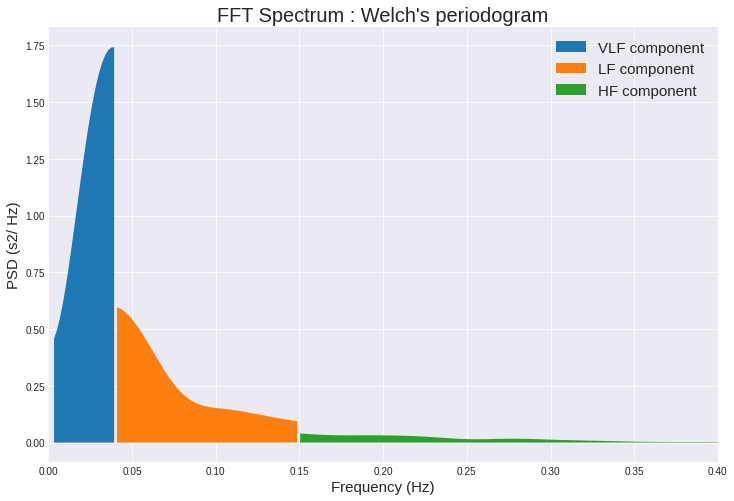

In [46]:
from hrvanalysis import plot_psd

plot_psd(nn_interval, method="welch")

In [47]:
print(results)

{'avnn': 831.5137614678899, 'hr': 73.04062883477803, 'SDNN': 90.6995053435377, 'pNN50': 47.24540901502504, 'RMSSD': 43.32246985099053, 'HRdiff': 45.45454545454545, 'VLF': 1253.0659317695215, 'LF': 1672.2046668444693, 'HF': 663.069710839543, 'LHFratio': 2.5219138191777972}


In [48]:
print(len(nn_interval))

1199


## Poincare Plot features

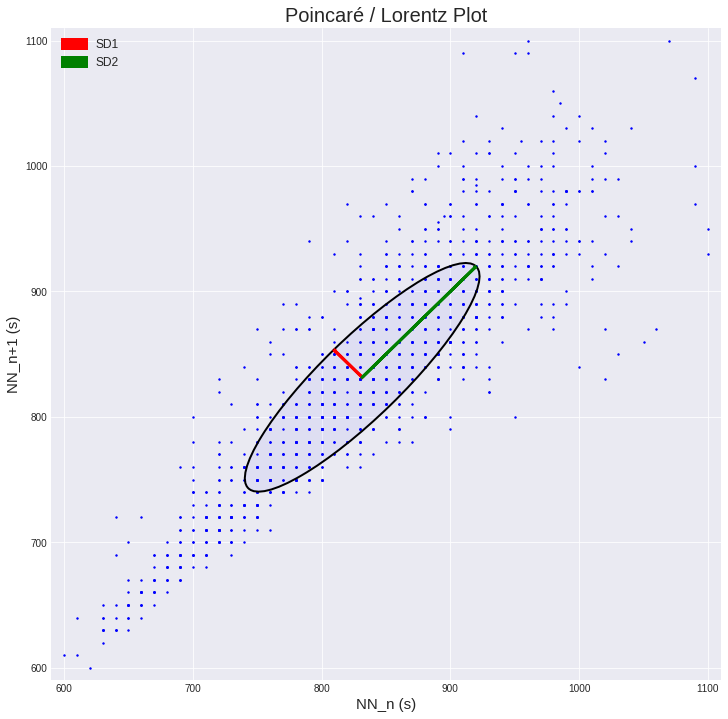

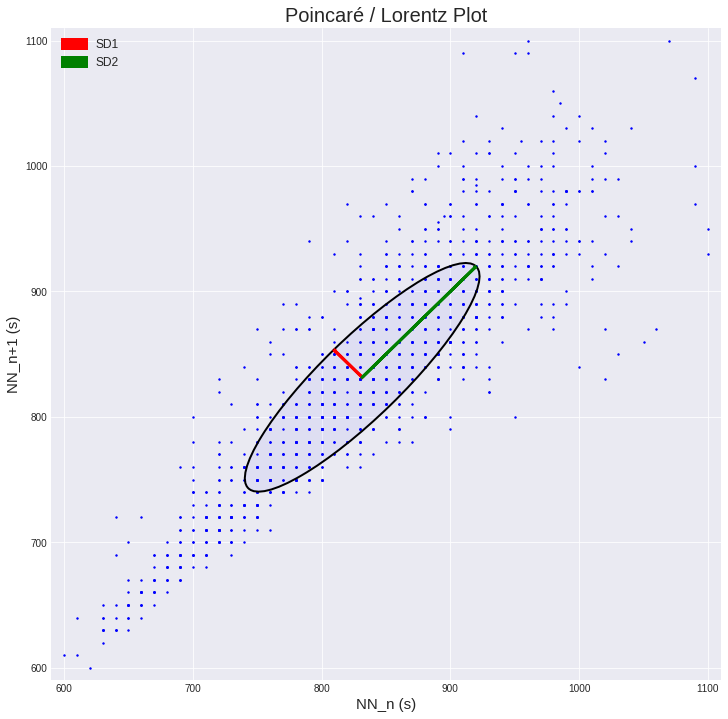

In [49]:
from hrvanalysis import plot_poincare

plot_poincare(nn_interval)
plot_poincare(nn_interval, plot_sd_features=True)

In [50]:
results['record']='a01'

In [51]:
results.keys()

dict_keys(['avnn', 'hr', 'SDNN', 'pNN50', 'RMSSD', 'HRdiff', 'VLF', 'LF', 'HF', 'LHFratio', 'record'])

In [52]:
import csv
csv_columns = results.keys()

csv_file = "features.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        
except IOError:
    print("I/O error")